In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
data = pd.read_csv('../ts_data/example_wp_log_peyton_manning.csv', parse_dates=['ds'])
data 

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [4]:
# add holidays

m = Prophet()
m.add_country_holidays(country_name='TH') # Thailand
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7979.5    0.00544341       266.325           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7995.22    0.00534555       611.103           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        8002.3    0.00153545       194.819      0.2221      0.7297      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8005.47   0.000178501       85.4865      0.9747      0.9747      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8006.64     0.0100032       233.449           1           1      633   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [5]:
m.train_holiday_names

0                                        New Year's Day
1                               Magha Pujab/Makha Bucha
2                                   Chakri Memorial Day
3                                     Songkran Festival
4                                     Buddha's Birthday
5                                        Coronation Day
6                   King Maha Vajiralongkorn's Birthday
7                                           Asalha Puja
8                                    Beginning of Vassa
9                          The Queen Sirikit's Birthday
10    Anniversary for the Death of King Bhumibol Adu...
11                               King Chulalongkorn Day
12       King Bhumibol Adulyadej's Birthday Anniversary
13                                     Constitution Day
14                                       New Year's Eve
dtype: object

In [6]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

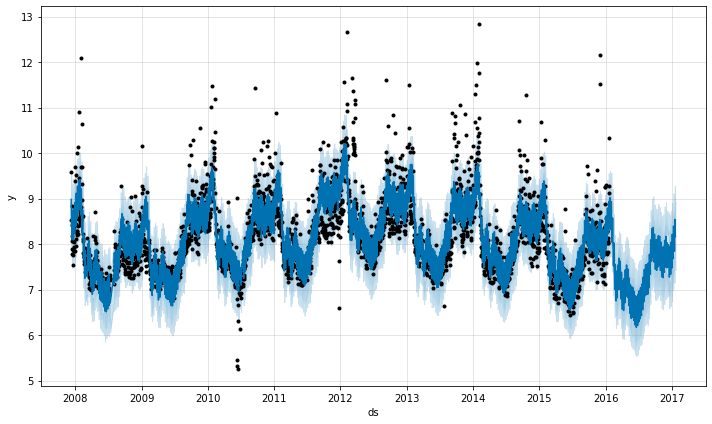

In [7]:
m.plot(forecast)
plt.show()

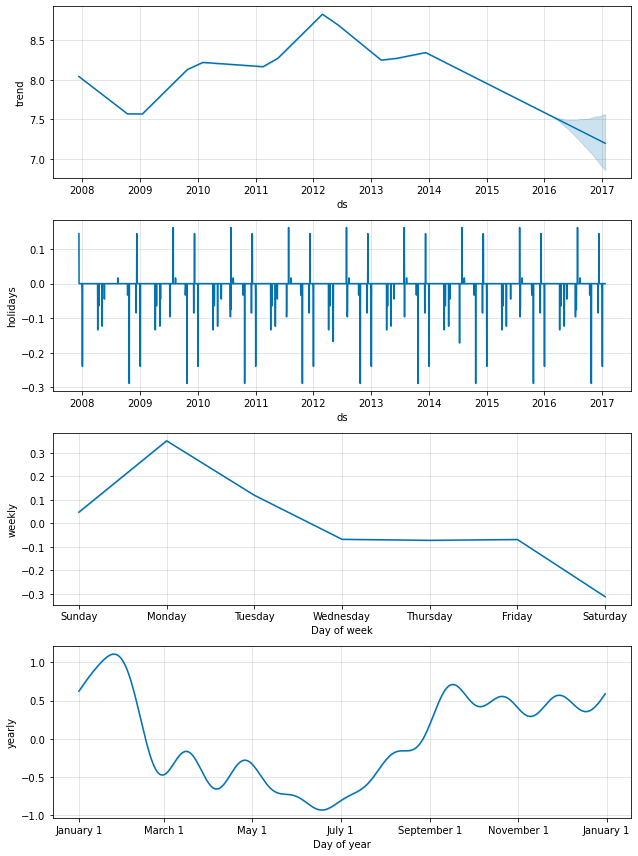

In [8]:
m.plot_components(forecast)
plt.show()